In [ ]:
import pandas as pd
import numpy as np
import urllib.request
import os
import glob
from tensorflow.python.keras import layers
from tensorflow import keras
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [ ]:
f= open('mini_classes_30.txt','r')
classes=f.readlines()
f.close()
classes = [c.replace('\n','').replace(' ','_') for c in classes]

In [ ]:
!mkdir data

mkdir: cannot create directory ‘data’: File exists


In [ ]:
classes=classes[:5]

In [ ]:
import urllib.request
import time

def download():
    base = 'https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/'
    for c in classes:
        cls_url = c.replace('_', '%20')
        path = base + cls_url + '.npy'
        print(path)

        # Introduce a delay between requests to avoid rate limiting
        time.sleep(1)  # Adjust the delay as needed

        urllib.request.urlretrieve(path, 'data/' + c + '.npy')

download()

https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/sun.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/ladder.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/eyeglasses.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/book.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/traffic%20light.npy


In [ ]:
sun = np.load('/content/data/sun.npy')
ladder = np.load('/content/data/ladder.npy')
eyeglasses = np.load('/content/data/eyeglasses.npy')
book = np.load('/content/data/book.npy')
traffic_light = np.load('/content/data/traffic_light.npy')
# tree = np.load('/content/data/tree.npy')
# shovel = np.load('/content/data/shovel.npy')
# bread = np.load('/content/data/bread.npy')
# table = np.load('/content/data/table.npy')
# mountain = np.load('/content/data/mountain.npy')
# chair = np.load('/content/data/chair.npy')
# face = np.load('/content/data/face.npy')
# airplane = np.load('/content/data/airplane.npy')
# cloud = np.load('/content/data/cloud.npy')
# grapes = np.load('/content/data/grapes.npy')
# mushroom = np.load('/content/data/mushroom.npy')
# star = np.load('/content/data/star.npy')
# clock = np.load('/content/data/clock.npy')
# broom = np.load('/content/data/broom.npy')
# stop_sign = np.load('/content/data/stop_sign.npy')
# smiley_face = np.load('/content/data/smiley_face.npy')
# apple = np.load('/content/data/apple.npy')
# shorts = np.load('/content/data/shorts.npy')
# flower = np.load('/content/data/flower.npy')
# cell_phone = np.load('/content/data/cell_phone.npy')
# radio = np.load('/content/data/radio.npy')
# pizza = np.load('/content/data/pizza.npy')
# umbrella = np.load('/content/data/umbrella.npy')
# cup = np.load('/content/data/cup.npy')
# moon = np.load('/content/data/moon.npy')

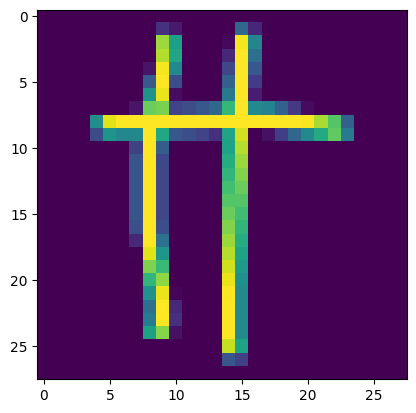

In [ ]:
import matplotlib.pyplot as plt
from random import randint
%matplotlib inline
idx = randint(0, len(ladder))
plt.imshow(ladder[idx].reshape(28,28))

In [ ]:
sun = sun.reshape(sun.shape[0], 28, 28, 1).astype('float32') / 255
ladder = ladder.reshape(ladder.shape[0], 28, 28, 1).astype('float32') / 255
eyeglasses = eyeglasses.reshape(eyeglasses.shape[0], 28, 28, 1).astype('float32') / 255
book = book.reshape(book.shape[0], 28, 28, 1).astype('float32') / 255
traffic_light = traffic_light.reshape(traffic_light.shape[0], 28, 28, 1).astype('float32') / 255
# tree = tree.reshape(tree.shape[0], 28, 28, 1).astype('float32') / 255
# shovel = shovel.reshape(shovel.shape[0], 28, 28, 1).astype('float32') / 255
# bread = bread.reshape(bread.shape[0], 28, 28, 1).astype('float32') / 255
# table = table.reshape(table.shape[0], 28, 28, 1).astype('float32') / 255
# mountain = mountain.reshape(mountain.shape[0], 28, 28, 1).astype('float32') / 255
# chair = chair.reshape(chair.shape[0], 28, 28, 1).astype('float32') / 255
# face = face.reshape(face.shape[0], 28, 28, 1).astype('float32') / 255
# airplane = airplane.reshape(airplane.shape[0], 28, 28, 1).astype('float32') / 255
# cloud = cloud.reshape(cloud.shape[0], 28, 28, 1).astype('float32') / 255
# grapes = grapes.reshape(grapes.shape[0], 28, 28, 1).astype('float32') / 255
# mushroom = mushroom.reshape(mushroom.shape[0], 28, 28, 1).astype('float32') / 255
# star = star.reshape(star.shape[0], 28, 28, 1).astype('float32') / 255
# clock = clock.reshape(clock.shape[0], 28, 28, 1).astype('float32') / 255
# broom = broom.reshape(broom.shape[0], 28, 28, 1).astype('float32') / 255
# stop_sign = stop_sign.reshape(stop_sign.shape[0], 28, 28, 1).astype('float32') / 255
# smiley_face = smiley_face.reshape(smiley_face.shape[0], 28, 28, 1).astype('float32') / 255
# apple = apple.reshape(apple.shape[0], 28, 28, 1).astype('float32') / 255
# shorts = shorts.reshape(shorts.shape[0], 28, 28, 1).astype('float32') / 255
# flower = flower.reshape(flower.shape[0], 28, 28, 1).astype('float32') / 255
# cell_phone = cell_phone.reshape(cell_phone.shape[0], 28, 28, 1).astype('float32') / 255
# radio = radio.reshape(radio.shape[0], 28, 28, 1).astype('float32') / 255
# pizza = pizza.reshape(pizza.shape[0], 28, 28, 1).astype('float32') / 255
# umbrella = umbrella.reshape(umbrella.shape[0], 28, 28, 1).astype('float32') / 255
# cup = cup.reshape(cup.shape[0], 28, 28, 1).astype('float32') / 255
# moon  = moon.reshape(moon.shape[0], 28, 28, 1).astype('float32') / 255

In [ ]:
sun_labels = np.zeros(sun.shape[0])
ladder_labels = np.ones(ladder.shape[0])
eyeglasses_labels = np.ones(eyeglasses.shape[0]) * 2
book_labels = np.ones(book.shape[0]) * 3
traffic_light_labels = np.ones(traffic_light.shape[0]) * 4
# tree_labels = np.zeros(tree.shape[0]) * 2
# shovel_labels = np.zeros(shovel.shape[0]) * 6
# bread_labels = np.zeros(bread.shape[0]) * 7
# table_labels = np.zeros(table.shape[0]) * 8
# mountain_labels = np.zeros(mountain.shape[0]) * 9

In [ ]:
book_labels

array([3., 3., 3., ..., 3., 3., 3.])

In [ ]:
x = np.concatenate((sun,ladder,eyeglasses,book,traffic_light))
y = np.concatenate((sun_labels,ladder_labels,eyeglasses_labels,book_labels, traffic_light_labels))

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

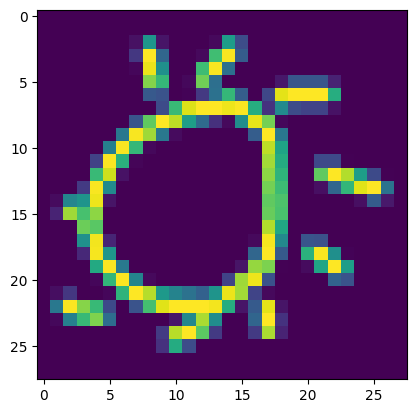

In [ ]:
import matplotlib.pyplot as plt
from random import randint
%matplotlib inline
idx = randint(0, len(x_train))
plt.imshow(sun[2].reshape(28,28))

In [ ]:
model = tf.keras.Sequential()
model.add(layers.Convolution2D(16, (3, 3), padding='same', input_shape=(28, 28, 1), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Convolution2D(32, (3, 3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Convolution2D(64, (3, 3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))

# Build the model
model.build(input_shape=(None, *x_train.shape[1:]))

# Train model
adam = tf.optimizers.Adam()
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 module_wrapper (ModuleWrap  (None, 28, 28, 16)        160       
 per)                                                            
                                                                 
 module_wrapper_1 (ModuleWr  (None, 14, 14, 16)        0         
 apper)                                                          
                                                                 
 module_wrapper_2 (ModuleWr  (None, 14, 14, 32)        4640      
 apper)                                                          
                                                                 
 module_wrapper_3 (ModuleWr  (None, 7, 7, 32)          0         
 apper)                                                          
                                                                 
 module_wrapper_4 (ModuleWr  (None, 7, 7, 64)          1

In [ ]:
model.fit(x = x_train, y = y_train, validation_split=0.1, batch_size = 256, verbose=2, epochs=5)

Epoch 1/5
2053/2053 - 18s - loss: 0.1322 - accuracy: 0.9590 - val_loss: 0.0827 - val_accuracy: 0.9747 - 18s/epoch - 9ms/step
Epoch 2/5
2053/2053 - 11s - loss: 0.0719 - accuracy: 0.9773 - val_loss: 0.0808 - val_accuracy: 0.9747 - 11s/epoch - 5ms/step
Epoch 3/5
2053/2053 - 12s - loss: 0.0612 - accuracy: 0.9802 - val_loss: 0.0601 - val_accuracy: 0.9807 - 12s/epoch - 6ms/step
Epoch 4/5
2053/2053 - 11s - loss: 0.0541 - accuracy: 0.9823 - val_loss: 0.0614 - val_accuracy: 0.9802 - 11s/epoch - 5ms/step
Epoch 5/5
2053/2053 - 10s - loss: 0.0493 - accuracy: 0.9836 - val_loss: 0.0559 - val_accuracy: 0.9821 - 10s/epoch - 5ms/step


In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

4561/4561 [==============================] - 13s 3ms/step - loss: 0.0565 - accuracy: 0.9819
Test accuracy: 0.981949508190155


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

# Make predictions on the test data
y_pred = np.argmax(model.predict(x_test), axis=-1)

4561/4561 [==============================] - 8s 2ms/step


In [ ]:
y_pred

array([0, 2, 2, ..., 2, 3, 2])

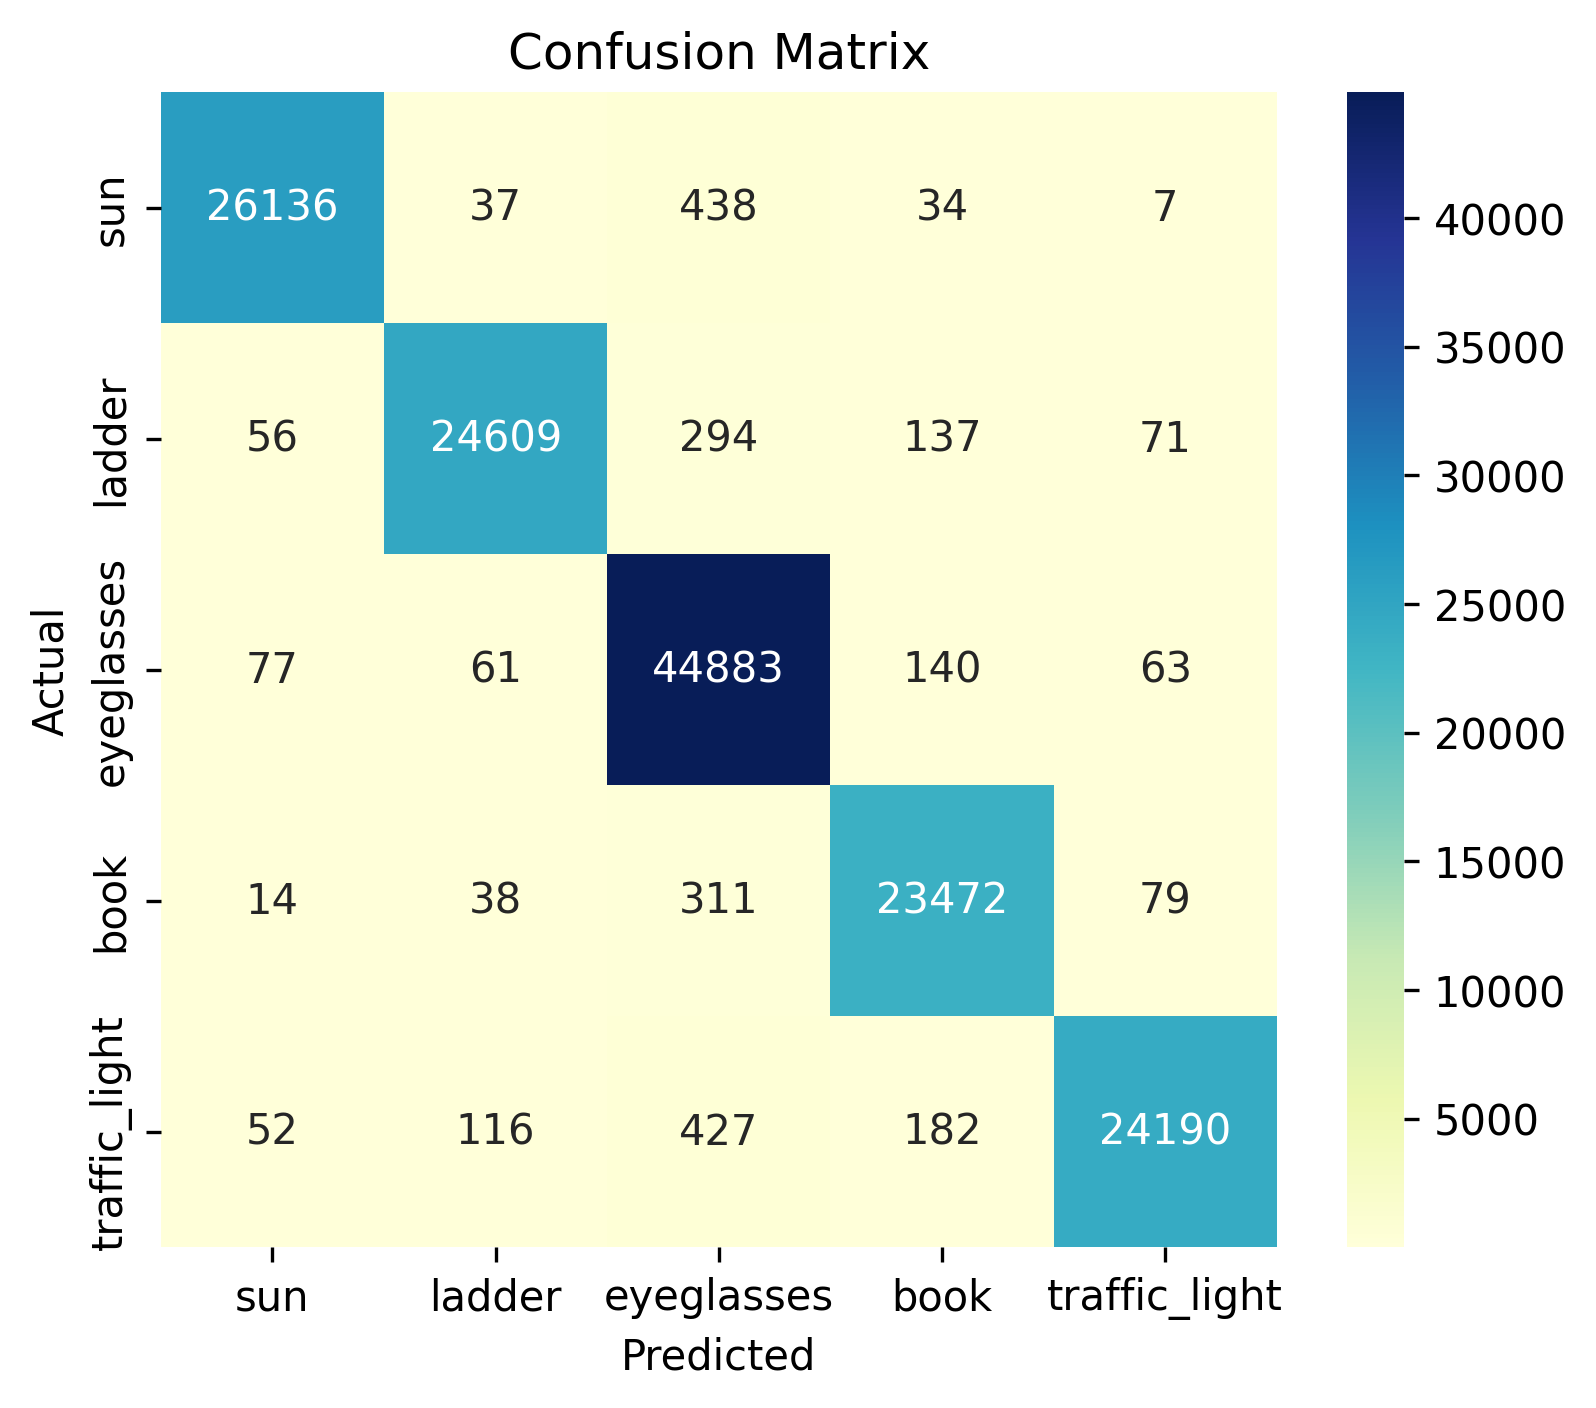

In [ ]:
import matplotlib.pyplot as plt

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(6,5), dpi = 300, clear = True)
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', xticklabels=['sun','ladder','eyeglasses','book', 'traffic_light'], yticklabels=['sun','ladder','eyeglasses','book', 'traffic_light'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
from PIL import Image

# Open the PNG file
original_image = Image.open('sun.png')

# Resize the image to 28x28 pixels
resized_image = original_image.resize((28, 28), Image.ANTIALIAS)

# Save the resized image
resized_image.save('resized_image.png')

<ipython-input-20-c141f24d09bd>:7: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  resized_image = original_image.resize((28, 28), Image.ANTIALIAS)


In [ ]:
import cv2
import numpy as np
import cv2
import numpy as np

# Function to convert PNG image to NumPy array
def png_to_npy(png_path):
    img = cv2.imread(png_path, cv2.IMREAD_GRAYSCALE)

    # Check if the image is successfully loaded
    if img is None:
        print(f"Error: Unable to read the image at {png_path}")
        return None
    return img

# Example usage
png_path = 'resized_image.png'
numpy_array = png_to_npy(png_path)

# Save the NumPy array as .npy file
if numpy_array is not None:
    np.save('resized.npy', numpy_array)

In [ ]:
predicts= np.load('resized.npy')

In [ ]:
predicts=predicts.reshape(1, 28, 28, 1)

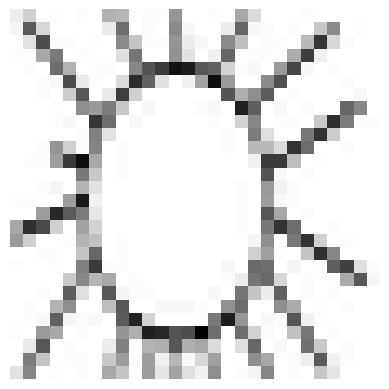

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Load the .npy file
image_data = np.load('resized.npy')

# Display the image
plt.imshow(image_data, cmap='gray')  # Use cmap='gray' for grayscale images
plt.axis('off')  # Turn off axis labels
plt.show()

In [ ]:
x=model.predict(predicts)

1/1 [==============================] - 0s 224ms/step


In [ ]:
np.argmax(x)

2